In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import cifar10

cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


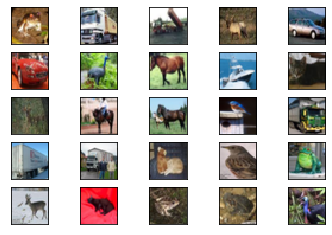

In [2]:
#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               #'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
 
# plot first few images
for i in range(25):    
    # define subplot
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.cm.binary)
     
# show the figure
plt.show()

In [0]:
X_train_final = x_train.reshape((-1, 32, 32, 3)) / 255.
X_test_final = x_test.reshape((-1, 32, 32, 3)) / 255.
#(num_samples, 3, 32, 32)

In [4]:
# define the model
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    #  10-node softmax layer, with each node representing a class of clothing.
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)
])
 
# compile the model
model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final,  y_test, verbose=2)

Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.3887 - acc: 0.5043
Epoch 2/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.0046 - acc: 0.6507
Epoch 3/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.8675 - acc: 0.6978
Epoch 4/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.7721 - acc: 0.7314
Epoch 5/5
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.6926 - acc: 0.7587
10000/10000 - 5s - loss: 0.9218 - acc: 0.6915


[0.9218113981246948, 0.6915]

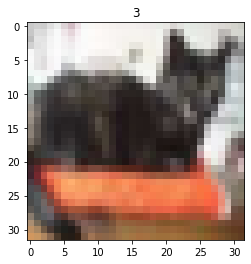

In [29]:
img_index = np.random.randint(x_test.shape[0])
img = x_test[img_index]
tf.expand_dims(img, 0)
#predictions = model_with_conv.predict(tf.expand_dims(img,y_test, 0))

plt.imshow(img, cmap=plt.cm.binary)
plt.title(y_test[img_index][0])
plt.show()
#print('\nPredicted class is:', np.argmax(predictions[0]))

In [0]:

#test_loss, test_acc = model_with_conv.evaluate(x_test,  y_test, verbose=3)
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()
#print('Loss:', test_loss)
#print('Accuracy:', test_acc)